In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mtick

In [3]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
df = pd.read_csv('data/House_Rent_Dataset.csv')
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  5/18/2022    2  10000  1100  Ground out of 2   Super Area   
1  5/13/2022    2  20000   800       1 out of 3   Super Area   
2  5/16/2022    2  17000  1000       1 out of 3   Super Area   
3   7/4/2022    2  10000   800       1 out of 2   Super Area   
4   5/9/2022    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City   Latitude  Longitude Furnishing Status  \
0                    Bandel  Kolkata  22.933640  88.371724       Unfurnished   
1  Phool Bagan, Kankurgachi  Kolkata  22.570201  88.396749    Semi-Furnished   
2   Salt Lake City Sector 2  Kolkata  22.591246  88.423438    Semi-Furnished   
3               Dumdum Park  Kolkata  22.607645  88.417350       Unfurnished   
4             South Dum Dum  Kolkata  22.562630  88.363040       Unfurnished   

   Tenant Preferred  Bathroom Point of Contact  
0  Bachelors/Family         2    Contact Owner  
1  Bachelors/Family         1    Contact Owner  
2  Bachelors/Family         1    Contact Owner  
3  Bachelors/Family         1    Contact Owner  
4         Bachelors         1    Contact Owner

In [5]:
df.shape

(4746, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Latitude           4746 non-null   float64
 9   Longitude          4746 non-null   float64
 10  Furnishing Status  4746 non-null   object 
 11  Tenant Preferred   4746 non-null   object 
 12  Bathroom           4746 non-null   int64  
 13  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 519.2+ KB


In [7]:
df.describe()

BHK          Rent         Size     Latitude    Longitude  \
count  4746.000000  4.746000e+03  4746.000000  4746.000000  4746.000000   
mean      2.083860  3.499345e+04   967.490729    17.945403    77.910405   
std       0.832256  7.810641e+04   634.202328     5.547431     6.320062   
min       1.000000  1.200000e+03    10.000000    -1.266670     8.450230   
25%       2.000000  1.000000e+04   550.000000    13.042792    77.161485   
50%       2.000000  1.600000e+04   850.000000    17.443622    77.676930   
75%       3.000000  3.300000e+04  1200.000000    19.193022    80.205216   
max       6.000000  3.500000e+06  8000.000000    47.281670    88.488920   

          Bathroom  
count  4746.000000  
mean      1.965866  
std       0.884532  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max      10.000000

In [8]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Latitude             0
Longitude            0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [9]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [10]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [11]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [12]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [13]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [14]:
df.value_counts(df['Tenant Preferred'])

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [15]:
df.value_counts(df['City'])

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [16]:
df.value_counts(df['Point of Contact'])

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

In [17]:
df.value_counts(df['Area Type'])

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [18]:
df.value_counts(df['Furnishing Status'])

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

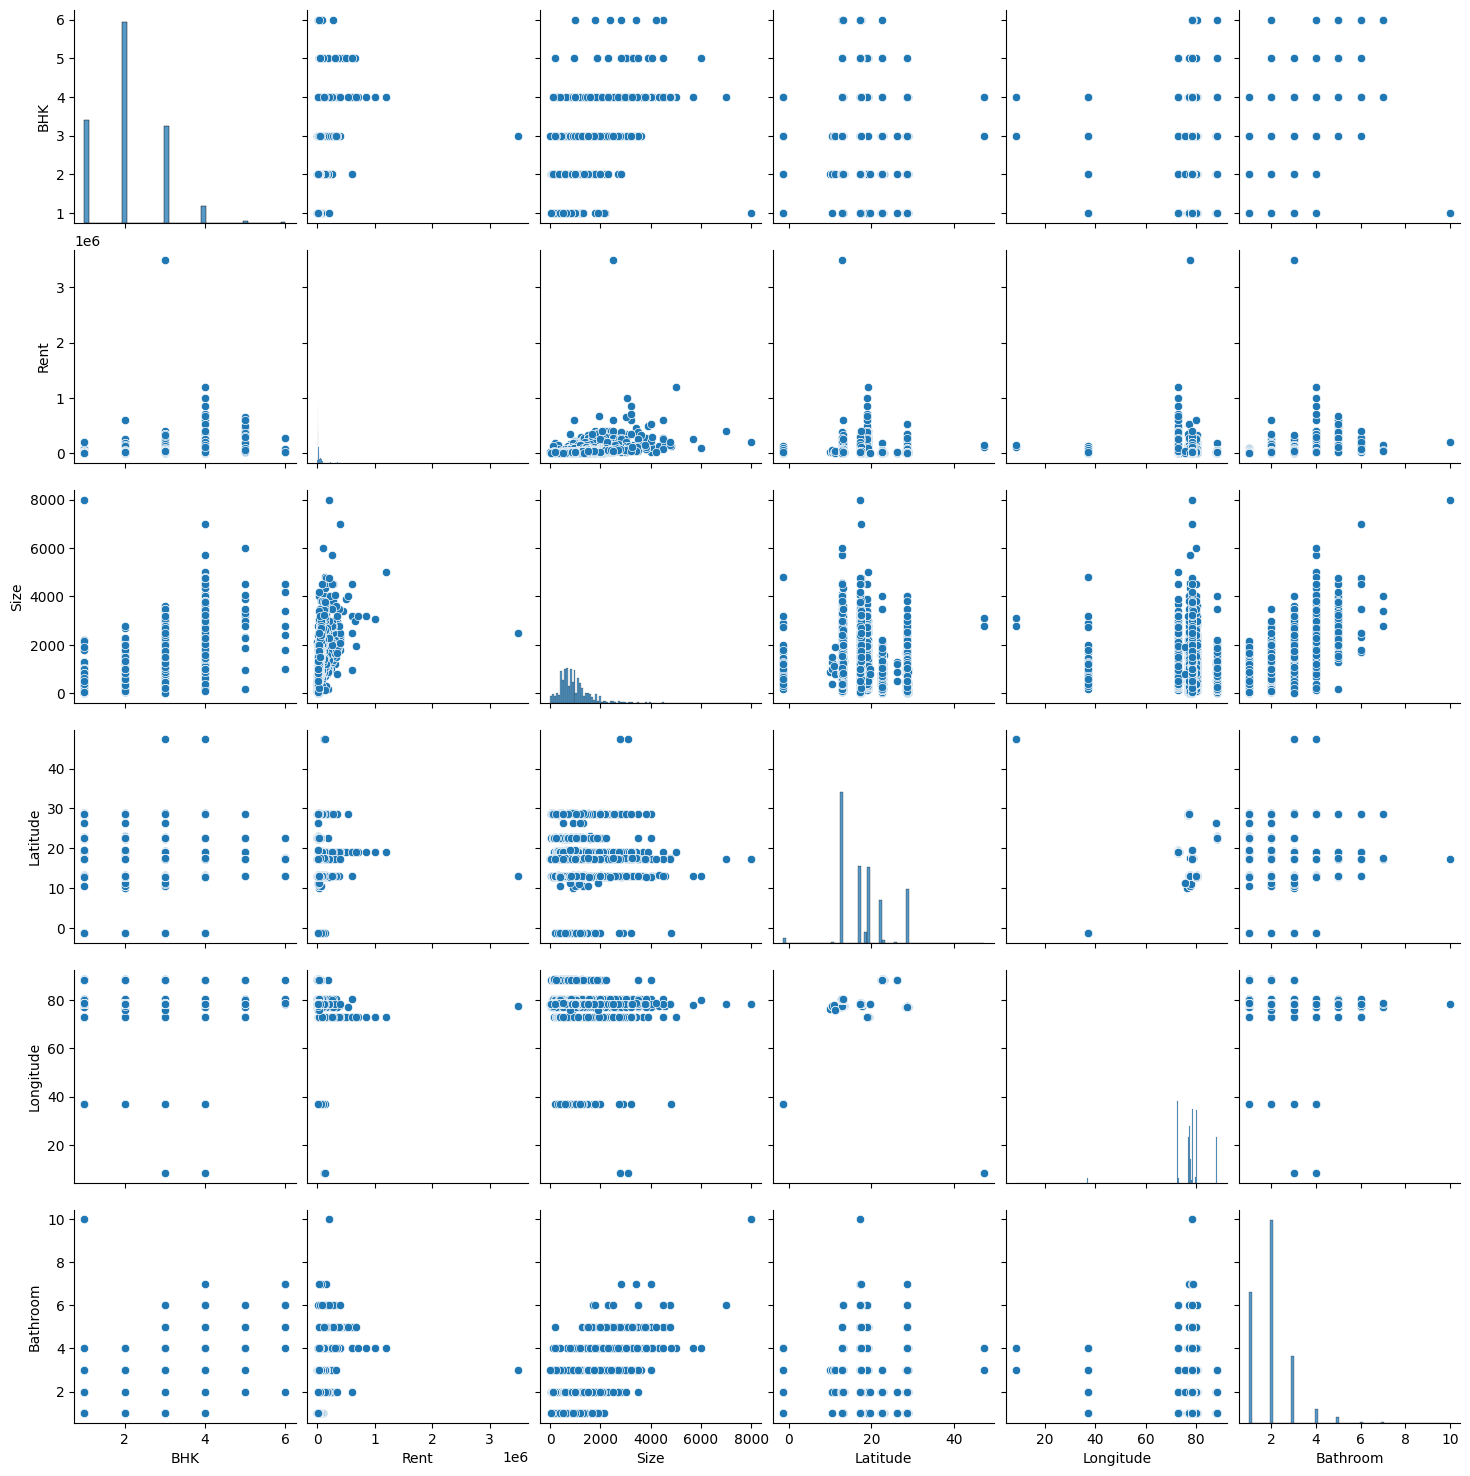

In [19]:
sns.pairplot(df)

In [20]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Latitude', 'Longitude', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [21]:
df.duplicated(subset=['Latitude', 'Longitude']).sum()

3679

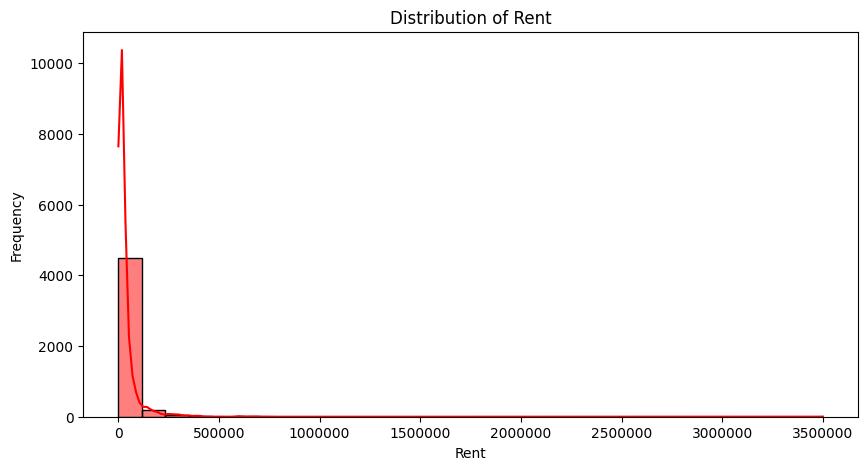

In [22]:
# Histogram for Rent distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Rent'], kde=True, color='red', bins=30)

# Set title and labels
plt.title("Distribution of Rent")
plt.xlabel("Rent")
plt.ylabel("Frequency")

# Format x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()

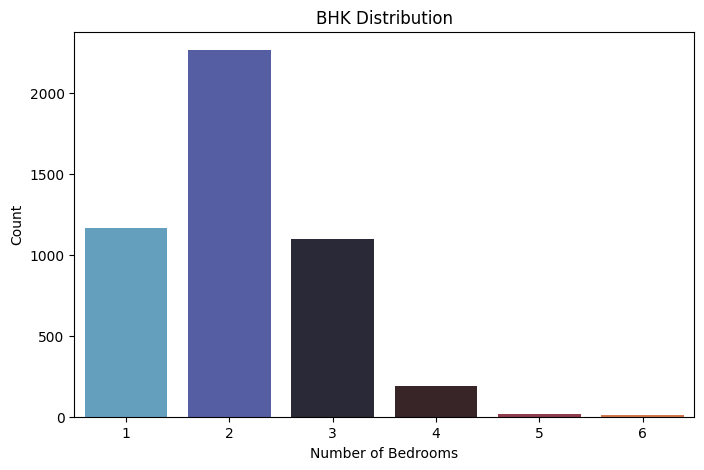

In [23]:
# Bar plot for BHK distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='BHK', data=df, palette='icefire')
plt.title("BHK Distribution")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

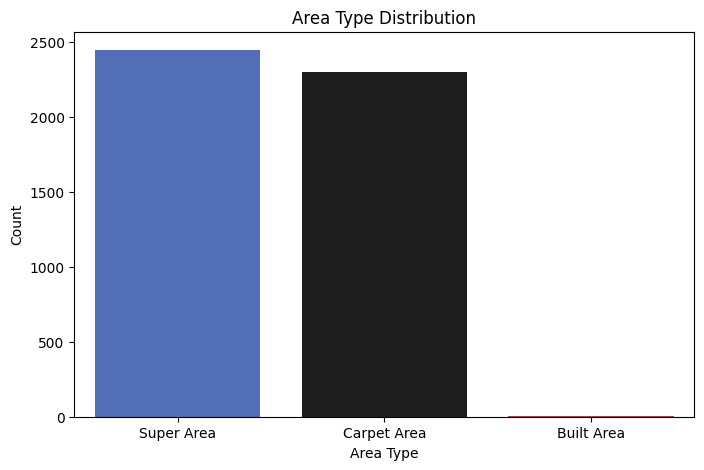

In [24]:
# Bar plot for Area Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Area Type', data=df, palette= 'icefire')
plt.title("Area Type Distribution")
plt.xlabel("Area Type")
plt.ylabel("Count")
plt.show()

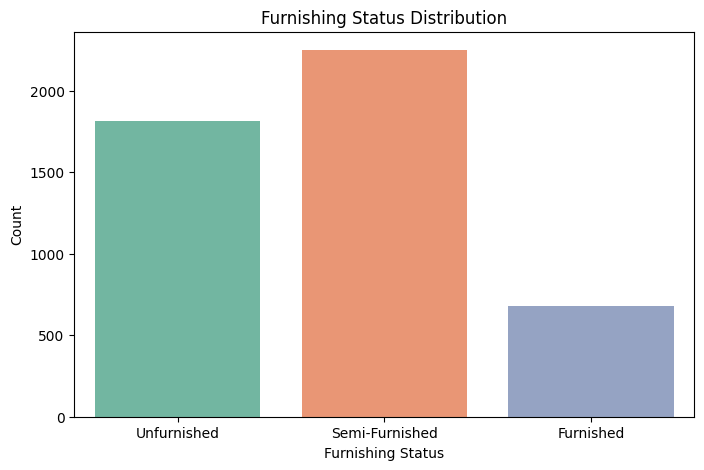

In [25]:
# Bar plot for Furnishing Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Furnishing Status', data=df, palette='Set2')
plt.title("Furnishing Status Distribution")
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.show()

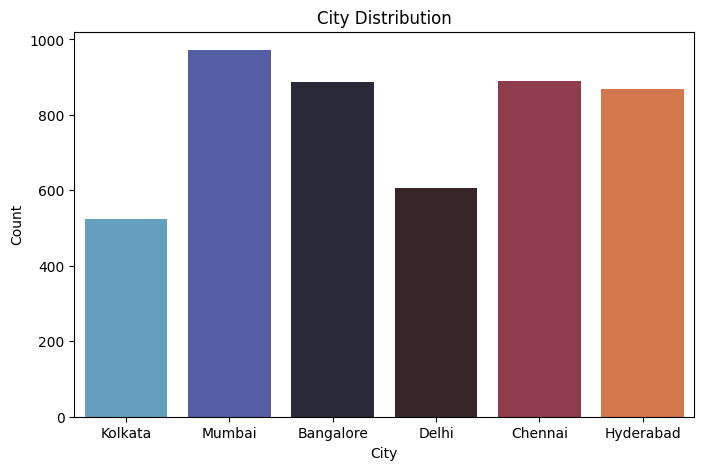

In [26]:
# Bar plot for city
plt.figure(figsize=(8, 5))
sns.countplot(x='City', data=df, palette='icefire')  # Replace 'City' with the actual column name
plt.title("City Distribution") # Update title
plt.xlabel("City") # Update xlabel
plt.ylabel("Count")
plt.show()

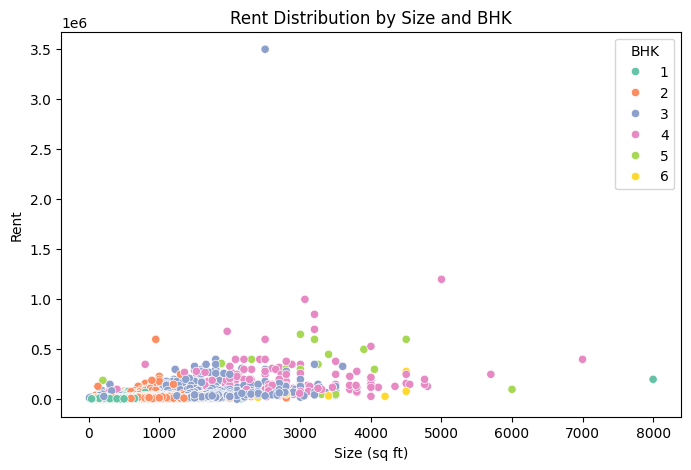

In [27]:
plt.figure(figsize=(8, 5))
plt.rcParams['axes.facecolor'] = 'white'
sns.scatterplot(x='Size', y='Rent', data=df, hue='BHK', palette="Set2")
plt.title("Rent Distribution by Size and BHK")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent")
plt.show()

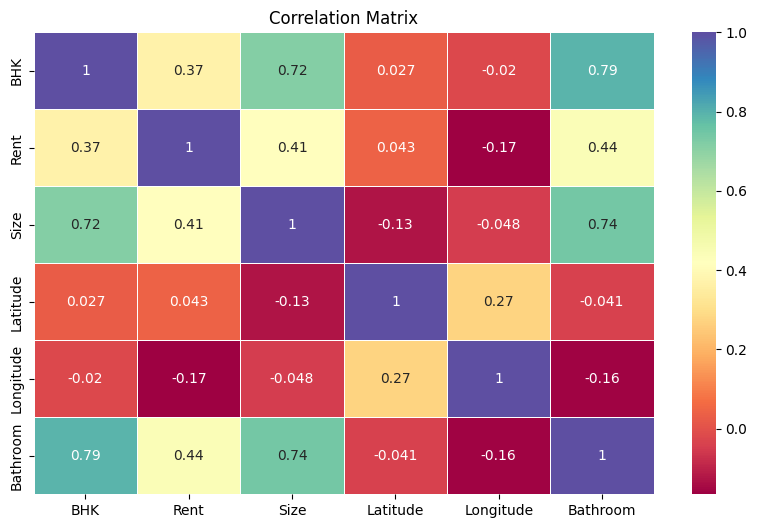

In [28]:
# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Spectral', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

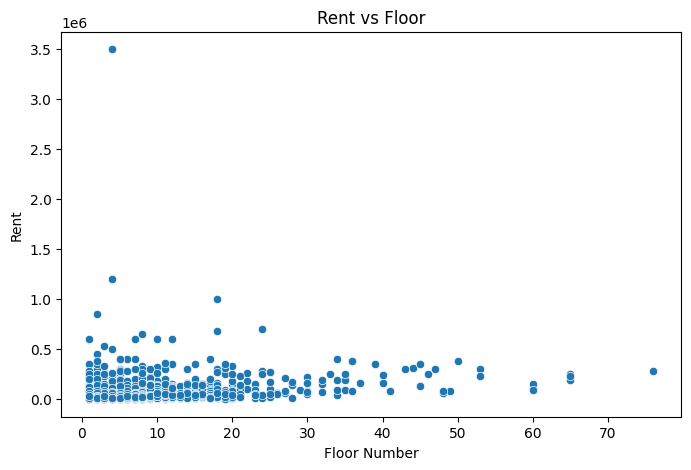

In [29]:
# Extract floor number inline during plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['Floor'].apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[0].isdigit() else None),
    y=df['Rent']
)
plt.title("Rent vs Floor")
plt.xlabel("Floor Number")
plt.ylabel("Rent")
plt.show()

In [30]:
# Group by 'Tenant Preferred' and calculate the mean rent for each category
mean_rent_per_category = df.groupby('Tenant Preferred')['Rent'].mean()

# Display the results sorted by average rent in descending order
mean_rent_per_category = mean_rent_per_category.sort_values(ascending=False)
print(mean_rent_per_category)

Tenant Preferred
Family              50020.341102
Bachelors           42143.793976
Bachelors/Family    31210.792683
Name: Rent, dtype: float64


# Map Are used to define location.
## Note
### 1)use one city at time, it take loot of time to show all l  

In [31]:
#!pip install folium

In [32]:
import folium
mumbai_data = df[df['City'] == 'Mumbai']

# Get the center coordinates for Mumbai
mumbai_lat = mumbai_data['Latitude'].mean()
mumbai_lon = mumbai_data['Longitude'].mean()

# Create the map centered around Mumbai
mumbai_map = folium.Map(location=[mumbai_lat, mumbai_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in mumbai_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(mumbai_map)

# Display the map
mumbai_map

In [33]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [34]:
import folium
Bangalore_data = df[df['City'] == 'Bangalore']

# Get the center coordinates for Mumbai
Bangalore_lat = Bangalore_data['Latitude'].mean()
Bangalore_lon = Bangalore_data['Longitude'].mean()

# Create the map centered around Mumbai
Bangalore_map = folium.Map(location=[Bangalore_lat, Bangalore_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in Bangalore_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(Bangalore_map)

# Display the map
Bangalore_map

In [35]:
import folium
Chennai_data = df[df['City'] == 'Chennai']

# Get the center coordinates for Mumbai
Chennai_lat = Chennai_data['Latitude'].mean()
Chennai_lon = Chennai_data['Longitude'].mean()

# Create the map centered around Mumbai
Chennai_map = folium.Map(location=[Chennai_lat, Chennai_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in Chennai_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(Chennai_map)

# Display the map
Chennai_map

In [36]:
import folium
Hyderabad_data = df[df['City'] == 'Hyderabad']

# Get the center coordinates for Mumbai
Hyderabad_lat = Hyderabad_data['Latitude'].mean()
Hyderabad_lon = Hyderabad_data['Longitude'].mean()

# Create the map centered around Mumbai
Hyderabad_map = folium.Map(location=[Hyderabad_lat, Hyderabad_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in Hyderabad_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(Hyderabad_map)

# Display the map
Hyderabad_map

In [37]:
import folium
Delhi_data = df[df['City'] == 'Delhi']

# Get the center coordinates for Mumbai
Delhi_lat = Delhi_data['Latitude'].mean()
Delhi_lon = Delhi_data['Longitude'].mean()

# Create the map centered around Mumbai
Delhi_map = folium.Map(location=[Delhi_lat, Delhi_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in Delhi_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(Delhi_map)

# Display the map
Delhi_map

In [38]:
import folium
Kolkata_data = df[df['City'] == 'Kolkata']

# Get the center coordinates for Mumbai
Kolkata_lat = Kolkata_data['Latitude'].mean()
Kolkata_lon = Kolkata_data['Longitude'].mean()

# Create the map centered around Mumbai
Kolkata_map = folium.Map(location=[Kolkata_lat, Kolkata_lon], zoom_start=12)

# Add markers for each location in mumbai_data
for index, row in Kolkata_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Area Locality']  # You can customize the popup content
    ).add_to(Kolkata_map)

# Display the map
Kolkata_map

#🔧 Feature Engineering 🔧

In [39]:
# 1. Exclude irrelevant columns
columns_to_exclude = ['Posted On', 'Area Locality', 'Point of Contact', 'Latitude',	'Longitude']
df_filtered = df.drop(columns=columns_to_exclude)

In [40]:
df_filtered.head(20)

BHK   Rent  Size            Floor    Area Type     City Furnishing Status  \
0     2  10000  1100  Ground out of 2   Super Area  Kolkata       Unfurnished   
1     2  20000   800       1 out of 3   Super Area  Kolkata    Semi-Furnished   
2     2  17000  1000       1 out of 3   Super Area  Kolkata    Semi-Furnished   
3     2  10000   800       1 out of 2   Super Area  Kolkata       Unfurnished   
4     2   7500   850       1 out of 2  Carpet Area  Kolkata       Unfurnished   
5     2   7000   600  Ground out of 1   Super Area  Kolkata       Unfurnished   
6     2  10000   700  Ground out of 4   Super Area  Kolkata       Unfurnished   
7     1   5000   250       1 out of 2   Super Area  Kolkata       Unfurnished   
8     2  26000   800       1 out of 2  Carpet Area  Kolkata       Unfurnished   
9     2  10000  1000       1 out of 3  Carpet Area  Kolkata    Semi-Furnished   
10    3  25000  1200       1 out of 4  Carpet Area  Kolkata    Semi-Furnished   
11    1   5000   400       1 out of 1  Carpet Area  Kolkata       Unfurnished   
12    1   6500   250       1 out of 4  Carpet Area  Kolkata         Furnished   
13    1   5500   375       1 out of 2  Carpet Area  Kolkata       Unfurnished   
14    3   8500   900  Ground out of 2  Carpet Area  Kolkata       Unfurnished   
15    3  40000  1286       1 out of 1  Carpet Area  Kolkata         Furnished   
16    2   6000   600       1 out of 2   Super Area  Kolkata    Semi-Furnished   
17    2  10000   800  Ground out of 2   Super Area  Kolkata       Unfurnished   
18    2  11000  2000  Ground out of 3  Carpet Area  Kolkata       Unfurnished   
19    2   6000   660       1 out of 2   Super Area  Kolkata       Unfurnished   

    Tenant Preferred  Bathroom  
0   Bachelors/Family         2  
1   Bachelors/Family         1  
2   Bachelors/Family         1  
3   Bachelors/Family         1  
4          Bachelors         1  
5   Bachelors/Family         2  
6          Bachelors         2  
7          Bachelors         1  
8          Bachelors         2  
9   Bachelors/Family         2  
10  Bachelors/Family         2  
11  Bachelors/Family         1  
12         Bachelors         1  
13  Bachelors/Family         1  
14         Bachelors         2  
15  Bachelors/Family         2  
16  Bachelors/Family         1  
17  Bachelors/Family         1  
18  Bachelors/Family         1  
19  Bachelors/Family         1

In [41]:
df_filtered['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [42]:
# Extract floor number from 'Floor' column
def extract_floor(floor_value):
    try:
        floor_info = floor_value.split(' ')[0]
        if floor_info.isdigit():
            return int(floor_info)
        elif floor_info.lower() in ['ground', 'lower']:
            return 0
        else:
            return None
    except:
        return None

df_filtered['Floor'] = df_filtered['Floor'].apply(extract_floor)
df_filtered.head(5)

BHK   Rent  Size  Floor    Area Type     City Furnishing Status  \
0    2  10000  1100    0.0   Super Area  Kolkata       Unfurnished   
1    2  20000   800    1.0   Super Area  Kolkata    Semi-Furnished   
2    2  17000  1000    1.0   Super Area  Kolkata    Semi-Furnished   
3    2  10000   800    1.0   Super Area  Kolkata       Unfurnished   
4    2   7500   850    1.0  Carpet Area  Kolkata       Unfurnished   

   Tenant Preferred  Bathroom  
0  Bachelors/Family         2  
1  Bachelors/Family         1  
2  Bachelors/Family         1  
3  Bachelors/Family         1  
4         Bachelors         1

In [43]:
df_filtered.isna().sum()

BHK                   0
Rent                  0
Size                  0
Floor                23
Area Type             0
City                  0
Furnishing Status     0
Tenant Preferred      0
Bathroom              0
dtype: int64

In [44]:
df_filtered = df_filtered.dropna()

In [45]:
df_filtered.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [46]:
# Apply One-Hot Encoding with dtype=int to ensure binary 1s and 0s
df_encoded = pd.get_dummies(df_filtered, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'], drop_first=True, dtype=int)
df_encoded.head()

BHK   Rent  Size  Floor  Bathroom  Area Type_Carpet Area  \
0    2  10000  1100    0.0         2                      0   
1    2  20000   800    1.0         1                      0   
2    2  17000  1000    1.0         1                      0   
3    2  10000   800    1.0         1                      0   
4    2   7500   850    1.0         1                      1   

   Area Type_Super Area  City_Chennai  City_Delhi  City_Hyderabad  \
0                     1             0           0               0   
1                     1             0           0               0   
2                     1             0           0               0   
3                     1             0           0               0   
4                     0             0           0               0   

   City_Kolkata  City_Mumbai  Furnishing Status_Semi-Furnished  \
0             1            0                                 0   
1             1            0                                 1   
2             1            0                                 1   
3             1            0                                 0   
4             1            0                                 0   

   Furnishing Status_Unfurnished  Tenant Preferred_Bachelors/Family  \
0                              1                                  1   
1                              0                                  1   
2                              0                                  1   
3                              1                                  1   
4                              1                                  0   

   Tenant Preferred_Family  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [47]:
# Convert 'Floor' to integer
df_encoded['Floor'] = df_encoded['Floor'].astype(int)
df_encoded.head()

BHK   Rent  Size  Floor  Bathroom  Area Type_Carpet Area  \
0    2  10000  1100      0         2                      0   
1    2  20000   800      1         1                      0   
2    2  17000  1000      1         1                      0   
3    2  10000   800      1         1                      0   
4    2   7500   850      1         1                      1   

   Area Type_Super Area  City_Chennai  City_Delhi  City_Hyderabad  \
0                     1             0           0               0   
1                     1             0           0               0   
2                     1             0           0               0   
3                     1             0           0               0   
4                     0             0           0               0   

   City_Kolkata  City_Mumbai  Furnishing Status_Semi-Furnished  \
0             1            0                                 0   
1             1            0                                 1   
2             1            0                                 1   
3             1            0                                 0   
4             1            0                                 0   

   Furnishing Status_Unfurnished  Tenant Preferred_Bachelors/Family  \
0                              1                                  1   
1                              0                                  1   
2                              0                                  1   
3                              1                                  1   
4                              1                                  0   

   Tenant Preferred_Family  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [48]:
# Import the necessary class
from sklearn.preprocessing import StandardScaler


# Select the numerical columns to scale
columns_to_scale = ['BHK', 'Size', 'Floor', 'Bathroom']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

#🚀 Model Creation 🚀



In [49]:
# Separate features and target
X = df_encoded.drop('Rent', axis=1)
y = df_encoded['Rent']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression Model

In [51]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R^2: 0.5535107484740456
Linear Regression RMSE: 32118.500237971082


In [52]:
# Evaluate the model
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)

# Print evaluation metrics
print(f"Linear Regression R²: {lr_r2:.3f}")
print(f"Linear Regression RMSE: {lr_rmse:.3f}")
print(f"Linear Regression MAE: {lr_mae:.3f}")

Linear Regression R²: 0.554
Linear Regression RMSE: 32118.500
Linear Regression MAE: 20644.367


#Random Forest Model

In [53]:
# Initialize and train the Random Forest model with tuned hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=200,          # Increase number of trees
    max_depth=10,              # Limit the depth of the trees
    min_samples_split=10,      # Set minimum samples to split a node
    min_samples_leaf=5,        # Set minimum samples at a leaf
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R^2: 0.6723616449427732
Random Forest RMSE: 27513.581181287573


In [54]:
# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest R²: {rf_r2:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")
print(f"Random Forest MAE: {rf_mae:.3f}")

Random Forest R²: 0.672
Random Forest RMSE: 27513.581
Random Forest MAE: 11166.343


# LightGBM Model

In [55]:
#!pip install lightgbm
import lightgbm as lgb

In [56]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,            # number of trees
    learning_rate=0.05,          # Learning rate
    max_depth=10,                # Control tree depth
    num_leaves=31,               # Increase the number of leaves to match max depth
    min_data_in_leaf=20,         # Minimum samples in a leaf to avoid overfitting
    min_gain_to_split=0.1,       # Minimum gain for a split to happen
    random_state=42,
    verbose=-1                   # Suppress warnings
)

lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgb_model.predict(X_test)

# Evaluate the model
lgbm_r2 = r2_score(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
lgbm_mae = mean_absolute_error(y_test, y_pred_lgbm)

# Print evaluation metrics
print(f"LightGBM R²: {lgbm_r2:.3f}")
print(f"LightGBM RMSE: {lgbm_rmse:.3f}")
print(f"LightGBM MAE: {lgbm_mae:.3f}")

LightGBM R²: 0.480
LightGBM RMSE: 34669.298
LightGBM MAE: 12348.877


# xgboost Model


In [57]:
#pip install xgboost

In [58]:
import xgboost as xgb

In [59]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=500,           # Number of boosting rounds
    learning_rate=0.05,         # Learning rate
    max_depth=8,                # Maximum depth of trees
    subsample=0.8,              # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,       # Fraction of features used for fitting each tree
    random_state=42             # Ensure reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost R²: {xgb_r2:.3f}")
print(f"XGBoost RMSE: {xgb_rmse:.3f}")
print(f"XGBoost MAE: {xgb_mae:.3f}")


XGBoost R²: -0.305
XGBoost RMSE: 54902.184
XGBoost MAE: 13925.081


In [60]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
estimators = [
    ('rf', rf_model),  # Random Forest
    ('xgb', xgb_model),  # XGBoost
    ('lgb', lgb_model),  # LightGBM
]

stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()  # Use Ridge for better generalization
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_stacked = stacked_model.predict(X_test)
stacked_r2 = r2_score(y_test, y_pred_stacked)
stacked_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
stacked_mae = mean_absolute_error(y_test, y_pred_stacked)

# Print evaluation metrics
print(f"Stacked Model R²: {stacked_r2:.3f}")
print(f"Stacked Model RMSE: {stacked_rmse:.3f}")
print(f"Stacked Model MAE: {stacked_mae:.3f}")


Stacked Model R²: 0.698
Stacked Model RMSE: 26406.883
Stacked Model MAE: 11398.001


#New Data Prediction

In [86]:
df.iloc[0].values.reshape(1,-1) 
# Access the first row using iloc[0]
# Extract the values as a NumPy array using .values
# Reshape the array into a 2D array with one row using .reshape(1,-1)

array([['5/18/2022', 2, 10000, 1100, 'Ground out of 2', 'Super Area',
        'Bandel', 'Kolkata', 22.93363987, 88.37172436, 'Unfurnished',
        'Bachelors/Family', 2, 'Contact Owner']], dtype=object)

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'Posted On' is the first column and needs to be excluded
numerical_features = df.select_dtypes(include=['number']).columns  # Select only numerical columns

# Drop rows with NaN values if necessary:
numerical_df = df[numerical_features].dropna()

# Fit the scaler on the numerical data
scaler = StandardScaler()
scaler.fit(numerical_df)

# Transform the numerical data in the first row
transformed_data = scaler.transform(numerical_df.iloc[0].values.reshape(1, -1))

# If you need to include the 'Posted On' column in the output:
# Concatenate 'Posted On' with transformed data
# First, convert transformed_data to a pandas DataFrame for easier concatenation
transformed_df = pd.DataFrame(transformed_data, columns=numerical_features)
final_row = pd.concat([df[['Posted On']].iloc[0], transformed_df], axis=1)

print(final_row)

                   0       BHK      Rent     Size  Latitude  Longitude  \
Posted On  5/18/2022       NaN       NaN      NaN       NaN        NaN   
0                NaN -0.100773 -0.320026  0.20896  0.899292    1.65543   

           Bathroom  
Posted On       NaN  
0          0.038594  


In [89]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is already defined and contains your dataset

# Replace 'Rent' with the actual name of your target variable column
target_variable_column = 'Rent'  

# Select only numerical columns
numerical_features = df.select_dtypes(include=['number']).columns  # Select only numerical columns

# Drop rows with NaN values if necessary:
numerical_df = df[numerical_features].dropna()

# Extract the target variable from the DataFrame
your_target_variable = numerical_df[target_variable_column]  

# Fit the scaler on the numerical data, excluding the target variable
scaler = StandardScaler()
scaler.fit(numerical_df.drop(columns=[target_variable_column]))  # Now the target column is excluded here

# Create a Linear Regression model
regression = LinearRegression()  

# Train the model with the scaled data
regression.fit(numerical_df.drop(columns=[target_variable_column]), your_target_variable)  # Train the model

# Ensure the input data for prediction has the same number of features as the training data
# Select all features used during training and scale them
input_data = numerical_df.drop(columns=[target_variable_column]).iloc[[0]]  # Select the first row as a DataFrame

# Scale the input data using the fitted scaler
scaled_input_data = scaler.transform(input_data) 

# Predict using the scaled input data
prediction = regression.predict(scaled_input_data)

print(prediction)


[75601.86504783]


#Pickle the Model file for Deployment

In [90]:
import pickle

In [95]:
# Save Linear Regression model
with open('models/lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save Random Forest model
with open('models/rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save LightGBM model
with open('models/lgb_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file) # Now lgb_model is defined

# Save XGBoost model
with open('models/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# Save Stacked model
with open('models/stacked_model.pkl', 'wb') as file:
    pickle.dump(stacked_model, file)

# Example: Save feature columns during training
feature_columns = X.columns.tolist()
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)



In [92]:
# Load Linear Regression model
with open('models/lr_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

# Load Random Forest model
with open('models/rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Load LightGBM model
with open('models/lgb_model.pkl', 'rb') as file: # Changed the file path to include 'models/'
    lgb_model = pickle.load(file)


# Load XGBoost model
with open('models/xgb_model.pkl', 'rb') as file: # Changed the file path to include 'models/'
    xgb_model = pickle.load(file)

# Load Stacked model
with open('models/stacked_model.pkl', 'rb') as file: # Changed the file path to include 'models/'
    stacked_model = pickle.load(file)


In [93]:
import pickle
import pandas as pd

# Assuming you have your trained Random Forest model loaded as 'rf_model'
# and your test data as 'X_test'

# 1. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# 2. Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(y_pred_rf, columns=['Predicted_Rent'])

# 3. Save the predictions DataFrame to a pickle file
predictions_df.to_pickle('models/rf_predictions.pkl')